### 1. Importación de Librerias

In [7]:
#Importación de librerías Requeridas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np
import sys
import tensorflow as tf
import time
from sklearn.preprocessing import OneHotEncoder
import datetime as dt

### 2. Lectura del data frame

In [3]:
df = pd.read_csv("ExtraccionCesar.csv")

#Se eliminan las columnas que se consideran irrelevantes para el proyecto
columnas_a_eliminar =  [
    'estu_consecutivo',
    'cole_cod_dane_establecimiento',
    'cole_cod_dane_sede',
    'cole_cod_depto_ubicacion',
    'cole_cod_mcpio_ubicacion',
    'cole_codigo_icfes',
    'cole_nombre_sede',
    'cole_sede_principal',
    'estu_cod_depto_presentacion',
    'estu_cod_mcpio_presentacion',
    'estu_cod_reside_depto',
    'estu_cod_reside_mcpio',
    'estu_depto_presentacion',
    'estu_depto_reside',
    'estu_estadoinvestigacion',
    'estu_mcpio_presentacion',
    'estu_mcpio_reside',
    'estu_pais_reside',
    'desemp_ingles',

    'cole_mcpio_ubicacion',
    'estu_tipodocumento',
    'fami_cuartoshogar',
    'cole_nombre_establecimiento',
]
df = df.drop(columns = columnas_a_eliminar)

### 3. Eliminar columnas con valores únicos

In [4]:
#Se eliminan columnas donde su clasificación es 100% igual
unique_value_columns = [col for col in df.columns if df[col].nunique() == 1]
df = df.loc[:, df.nunique() > 1]

num_columnas = len(df.columns)
print(f"El DataFrame tiene {num_columnas} columnas.")
print(unique_value_columns)

El DataFrame tiene 24 columnas.
['departamento', 'cole_genero', 'estu_estudiante', 'estu_privado_libertad']


### 4. Arreglar formato de la variable "Fecha de nacimiento"

In [ ]:
# Convertir la columna 'estu_fechanacimiento' al formato datetime
df['estu_fechanacimiento'] = pd.to_datetime(df['estu_fechanacimiento'], errors='coerce')

# Revisar si hubo valores no convertidos y eliminarlos
null_dates = df['estu_fechanacimiento'].isnull().sum()
df = df.dropna(subset=['estu_fechanacimiento'])
null_dates = df['estu_fechanacimiento'].isnull().sum()
null_dates

# Suponiendo que df ya contiene la columna 'estu_fechanacimiento' en formato datetime
# Obtener la fecha actual
current_date = dt.datetime.now()

# Calcular la edad en años
df['estu_edad'] = (current_date - df['estu_fechanacimiento']).dt.days // 365
df = df.drop(columns = 'estu_fechanacimiento')

C:\Users\higut\AppData\Local\Temp\ipykernel_21392\828374780.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['estu_fechanacimiento'] = pd.to_datetime(df['estu_fechanacimiento'], errors='coerce')


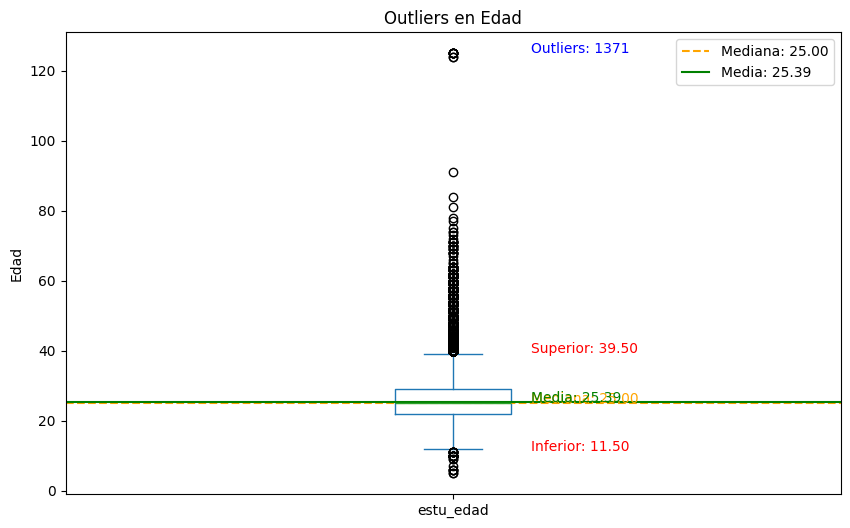

In [9]:
plt.figure(figsize=(10, 6))
ax = df['estu_edad'].plot(kind='box', title=f'Outliers en Edad', ylabel = 'Edad')
    
# Cálculo de la mediana y la media
median = df['estu_edad'].median()
mean = df['estu_edad'].mean()
    
# Límites de los cuartiles
Q1 = df['estu_edad'].quantile(0.25)
Q3 = df['estu_edad'].quantile(0.75)
IQR = Q3 - Q1

# Límites de los outliers
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR
    
# Conteo de outliers
outliers_count = df[(df['estu_edad'] < inf) | (df['estu_edad'] > sup)]['estu_edad'].count()

    
# Anotaciones en el plot
plt.axhline(y=median, color='orange', linestyle='--', label=f'Mediana: {median:.2f}')
plt.axhline(y=mean, color='green', linestyle='-', label=f'Media: {mean:.2f}')
plt.text(x=1.1, y=median, s=f'Mediana: {median:.2f}', color='orange')
plt.text(x=1.1, y=mean, s=f'Media: {mean:.2f}', color='green')
plt.text(x=1.1, y=sup, s=f'Superior: {sup:.2f}', color='red')
plt.text(x=1.1, y=inf, s=f'Inferior: {inf:.2f}', color='red')
plt.text(x=1.1, y=max(df['estu_edad']), s=f'Outliers: {outliers_count}', color='blue')
plt.legend()
plt.show()

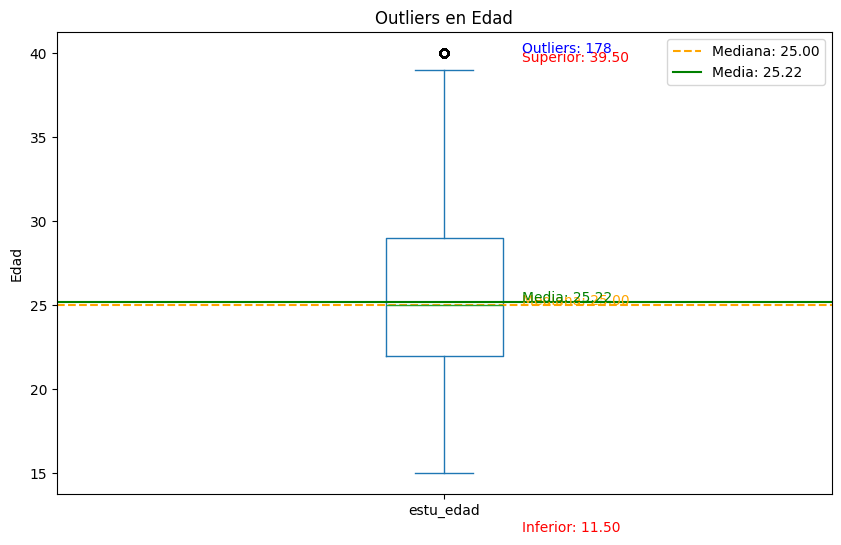

In [10]:
# Filtrar los datos para que estén entre 15 y 40 años
df_filtered = df[(df['estu_edad'] >= 15) & (df['estu_edad'] <= 40)]

# Crear el boxplot
plt.figure(figsize=(10, 6))
ax = df_filtered['estu_edad'].plot(kind='box', title=f'Outliers en Edad', ylabel='Edad')

# Cálculo de la mediana y la media
median = df_filtered['estu_edad'].median()
mean = df_filtered['estu_edad'].mean()

# Límites de los cuartiles
Q1 = df_filtered['estu_edad'].quantile(0.25)
Q3 = df_filtered['estu_edad'].quantile(0.75)
IQR = Q3 - Q1

# Límites de los outliers
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR

# Conteo de outliers
outliers_count = df_filtered[(df_filtered['estu_edad'] < inf) | (df_filtered['estu_edad'] > sup)]['estu_edad'].count()

# Anotaciones en el plot
plt.axhline(y=median, color='orange', linestyle='--', label=f'Mediana: {median:.2f}')
plt.axhline(y=mean, color='green', linestyle='-', label=f'Media: {mean:.2f}')
plt.text(x=1.1, y=median, s=f'Mediana: {median:.2f}', color='orange')
plt.text(x=1.1, y=mean, s=f'Media: {mean:.2f}', color='green')
plt.text(x=1.1, y=sup, s=f'Superior: {sup:.2f}', color='red')
plt.text(x=1.1, y=inf, s=f'Inferior: {inf:.2f}', color='red')
plt.text(x=1.1, y=max(df_filtered['estu_edad']), s=f'Outliers: {outliers_count}', color='blue')
plt.legend()
plt.show()


### 5. Eliminar valores duplicados

In [11]:
df = df_filtered
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

df = df.drop_duplicates()
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')
df

Number of Duplicate Entries: 27250
Number of Duplicate Entries: 0


,periodo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_jornada,cole_naturaleza,estu_genero,estu_nacionalidad,fami_educacionmadre,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,estu_edad
0,20224,URBANO,N,A,ACADÉMICO,UNICA,OFICIAL,F,COLOMBIA,NaN,...,NaN,NaN,NaN,48.00,58.00,45.0,50.0,42.0,243.0,19
1,20224,URBANO,N,A,TÉCNICO,TARDE,OFICIAL,F,COLOMBIA,Secundaria (Bachillerato) completa,...,Si,Si,Si,52.00,47.00,33.0,43.0,53.0,223.0,20
2,20224,URBANO,N,A,TÉCNICO/ACADÉMICO,NOCHE,OFICIAL,M,COLOMBIA,Primaria incompleta,...,No,Si,Si,62.00,68.00,66.0,61.0,61.0,319.0,20
3,20224,URBANO,N,A,ACADÉMICO,MAÑANA,OFICIAL,M,COLOMBIA,Secundaria (Bachillerato) completa,...,No,No,No,58.00,44.00,37.0,45.0,45.0,220.0,19
4,20224,URBANO,N,A,ACADÉMICO,COMPLETA,NO OFICIAL,M,COLOMBIA,Educación profesional completa,...,Si,Si,No,72.00,70.00,66.0,65.0,60.0,329.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152483,20102,RURAL,N,A,TÉCNICO/ACADÉMICO,TARDE,OFICIAL,F,COLOMBIA,Primaria incompleta,...,No,No,No,38.92,39.12,NaN,NaN,NaN,NaN,31
152484,20172,URBANO,N,A,ACADÉMICO,COMPLETA,NO OFICIAL,M,COLOMBIA,Educación profesional completa,...,Si,Si,Si,38.00,42.00,29.0,44.0,32.0,184.0,25
152485,20112,URBANO,N,A,ACADÉMICO,MAÑANA,OFICIAL,M,COLOMBIA,Secundaria (Bachillerato) completa,...,No,No,Si,34.00,49.00,NaN,NaN,NaN,NaN,30
152486,20194,URBANO,N,A,TÉCNICO/ACADÉMICO,MAÑANA,OFICIAL,F,COLOMBIA,Secundaria (Bachillerato) incompleta,...,No,No,No,37.00,41.00,32.0,40.0,46.0,198.0,24


### 6. Eliminar valores nulos en "Puntaje Global"

In [12]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

Number of Missing Values: 222157
periodo                         0
cole_area_ubicacion             0
cole_bilingue               13991
cole_calendario                 0
cole_caracter                1319
cole_jornada                    0
cole_naturaleza                 0
estu_genero                    68
estu_nacionalidad               0
fami_educacionmadre          2947
fami_educacionpadre          2911
fami_estratovivienda         3330
fami_personashogar           1786
fami_tieneautomovil          1862
fami_tienecomputador         1991
fami_tieneinternet           2753
fami_tienelavadora           1785
punt_ingles                    66
punt_matematicas                0
punt_sociales_ciudadanas    46837
punt_c_naturales            46837
punt_lectura_critica        46837
punt_global                 46837
estu_edad                       0
dtype: int64


In [13]:
df = df.dropna(subset=['punt_global'])
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)
df

periodo                         0
cole_area_ubicacion             0
cole_bilingue               10594
cole_calendario                 0
cole_caracter                1319
cole_jornada                    0
cole_naturaleza                 0
estu_genero                    65
estu_nacionalidad               0
fami_educacionmadre          2492
fami_educacionpadre          2458
fami_estratovivienda         2845
fami_personashogar           1550
fami_tieneautomovil          1626
fami_tienecomputador         1554
fami_tieneinternet           2513
fami_tienelavadora           1549
punt_ingles                    66
punt_matematicas                0
punt_sociales_ciudadanas        0
punt_c_naturales                0
punt_lectura_critica            0
punt_global                     0
estu_edad                       0
dtype: int64


,periodo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_jornada,cole_naturaleza,estu_genero,estu_nacionalidad,fami_educacionmadre,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,estu_edad
0,20224,URBANO,N,A,ACADÉMICO,UNICA,OFICIAL,F,COLOMBIA,NaN,...,NaN,NaN,NaN,48.0,58.0,45.0,50.0,42.0,243.0,19
1,20224,URBANO,N,A,TÉCNICO,TARDE,OFICIAL,F,COLOMBIA,Secundaria (Bachillerato) completa,...,Si,Si,Si,52.0,47.0,33.0,43.0,53.0,223.0,20
2,20224,URBANO,N,A,TÉCNICO/ACADÉMICO,NOCHE,OFICIAL,M,COLOMBIA,Primaria incompleta,...,No,Si,Si,62.0,68.0,66.0,61.0,61.0,319.0,20
3,20224,URBANO,N,A,ACADÉMICO,MAÑANA,OFICIAL,M,COLOMBIA,Secundaria (Bachillerato) completa,...,No,No,No,58.0,44.0,37.0,45.0,45.0,220.0,19
4,20224,URBANO,N,A,ACADÉMICO,COMPLETA,NO OFICIAL,M,COLOMBIA,Educación profesional completa,...,Si,Si,No,72.0,70.0,66.0,65.0,60.0,329.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152479,20142,URBANO,N,A,TÉCNICO/ACADÉMICO,MAÑANA,OFICIAL,F,COLOMBIA,Primaria incompleta,...,No,No,No,48.0,52.0,45.0,50.0,57.0,254.0,26
152482,20142,URBANO,N,A,TÉCNICO/ACADÉMICO,MAÑANA,OFICIAL,F,COLOMBIA,Educación profesional completa,...,No,Si,No,52.0,62.0,52.0,51.0,65.0,285.0,25
152484,20172,URBANO,N,A,ACADÉMICO,COMPLETA,NO OFICIAL,M,COLOMBIA,Educación profesional completa,...,Si,Si,Si,38.0,42.0,29.0,44.0,32.0,184.0,25
152486,20194,URBANO,N,A,TÉCNICO/ACADÉMICO,MAÑANA,OFICIAL,F,COLOMBIA,Secundaria (Bachillerato) incompleta,...,No,No,No,37.0,41.0,32.0,40.0,46.0,198.0,24


### 7. Eliminar valores incoherentes en puntajes individuales

In [14]:
# Define las columnas que quieres verificar
columns_to_check = [
    "punt_ingles", "punt_matematicas", 
    "punt_sociales_ciudadanas", "punt_c_naturales", 
    "punt_lectura_critica"
]

# Filtrar las filas donde los valores en estas columnas estén entre 0 y 100
for column in columns_to_check:
    df = df[(df[column] >= 0) & (df[column] <= 100)]

### 7. Rellenar espacios vacios

In [15]:
df = df.fillna("Desconocido")

# Verificar que no queden valores nulos
null_counts = df.isnull().sum().sum()

null_counts


0

In [16]:
df.to_csv("sindummieslimpio.csv",index=False)

### 8. Base datos para el modelo

In [17]:
# Seleccionar columnas categóricas, enteras y de punto flotante
catcols = df.select_dtypes(exclude=['int64', 'float64']).columns
intcols = df.select_dtypes(include=['int64']).columns
floatcols = df.select_dtypes(include=['float64']).columns



# Codificación de variables categóricas
df_dummies = pd.get_dummies(df, columns=catcols, dtype=int, drop_first=True)

# Identificar las categorías excluidas
excluded_categories = {}
for col in catcols:
    unique_values = df[col].unique()
    excluded_categories[col] = unique_values[0]  # La primera categoría es la excluida

# Mostrar las categorías excluidas
print("Categorías excluidas por multicolinealidad:")
for col, category in excluded_categories.items():
    print(f"{col}: {category}")

# Visualizar el DataFrame con variables dummies
df_dummies


Categorías excluidas por multicolinealidad:
cole_area_ubicacion: URBANO
cole_bilingue: N
cole_calendario: A
cole_caracter: ACADÉMICO
cole_jornada: UNICA
cole_naturaleza: OFICIAL
estu_genero: F
estu_nacionalidad: COLOMBIA
fami_educacionmadre: Desconocido
fami_educacionpadre: Desconocido
fami_estratovivienda: Desconocido
fami_personashogar: Desconocido
fami_tieneautomovil: Desconocido
fami_tienecomputador: Desconocido
fami_tieneinternet: Desconocido
fami_tienelavadora: Desconocido


,periodo,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,estu_edad,cole_area_ubicacion_URBANO,cole_bilingue_N,...,fami_personashogar_Tres,fami_personashogar_Una,fami_tieneautomovil_No,fami_tieneautomovil_Si,fami_tienecomputador_No,fami_tienecomputador_Si,fami_tieneinternet_No,fami_tieneinternet_Si,fami_tienelavadora_No,fami_tienelavadora_Si
0,20224,48.0,58.0,45.0,50.0,42.0,243.0,19,1,1,...,0,0,0,0,0,0,0,0,0,0
1,20224,52.0,47.0,33.0,43.0,53.0,223.0,20,1,1,...,0,0,1,0,0,1,0,1,0,1
2,20224,62.0,68.0,66.0,61.0,61.0,319.0,20,1,1,...,0,0,1,0,1,0,0,1,0,1
3,20224,58.0,44.0,37.0,45.0,45.0,220.0,19,1,1,...,0,0,1,0,1,0,1,0,1,0
4,20224,72.0,70.0,66.0,65.0,60.0,329.0,18,1,1,...,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152479,20142,48.0,52.0,45.0,50.0,57.0,254.0,26,1,1,...,0,0,1,0,1,0,1,0,1,0
152482,20142,52.0,62.0,52.0,51.0,65.0,285.0,25,1,1,...,1,0,1,0,1,0,0,1,1,0
152484,20172,38.0,42.0,29.0,44.0,32.0,184.0,25,1,1,...,0,0,1,0,0,1,0,1,0,1
152486,20194,37.0,41.0,32.0,40.0,46.0,198.0,24,1,1,...,0,0,1,0,1,0,1,0,1,0


In [18]:
df_dummies.to_csv("banklimpio.csv",index=False)